In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
import pandas as pd
df = pd.read_csv('cirrhosis.csv')
pd.set_option('display.max_rows', None)
print(df)


      ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
5      6    2503      D          Placebo  24201   F       N            Y   
6      7    1832      C          Placebo  20284   F       N            Y   
7      8    2466      D          Placebo  19379   F       N            N   
8      9    2400      D  D-penicillamine  15526   F       N            N   
9     10      51      D          Placebo  25772   F       Y            N   
10    11    3762      D          Placebo  19619   F       N            Y   
11    12     304      D          Placebo  21600   F       N            N   
12    13    

## **Informasi Dataset**

In [ ]:
print("\n Info Dataset:")
print(df.info())


✅ Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    int64  
 2   Drug           418 non-null    int64  
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    int64  
 5   Ascites        418 non-null    int64  
 6   Hepatomegaly   418 non-null    int64  
 7   Spiders        418 non-null    int64  
 8   Edema          418 non-null    int64  
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float6

## **Deskripsi Statistik**

In [10]:
print("\n Statistik Deskriptif:")
print(df.describe(include='all'))


 Statistik Deskriptif:
            N_Days      Status        Drug           Age         Sex  \
count   418.000000  418.000000  418.000000    418.000000  418.000000   
mean   1917.782297    0.830144    0.875598  18533.351675    0.105263   
std    1104.672992    0.955785    0.785863   3815.845055    0.307260   
min      41.000000    0.000000    0.000000   9598.000000    0.000000   
25%    1092.750000    0.000000    0.000000  15644.500000    0.000000   
50%    1730.000000    0.000000    1.000000  18628.000000    0.000000   
75%    2613.500000    2.000000    2.000000  21272.500000    0.000000   
max    4795.000000    2.000000    2.000000  28650.000000    1.000000   

          Ascites  Hepatomegaly     Spiders       Edema   Bilirubin  \
count  418.000000    418.000000  418.000000  418.000000  418.000000   
mean     0.564593      0.889952    0.722488    0.200957    3.220813   
std      0.868798      0.778823    0.842243    0.506835    4.407506   
min      0.000000      0.000000    0.000000

## **Pemeriksaan Missing Values**

In [11]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
N_Days             0
Status             0
Drug               0
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


## **Data Undestanding**

### **1.Data Undestanding**
Dataset di ata berisiinformasi medis dari 418 pasien dengan penyakit sirosis hati. Tujuannya kemungkinan untuk analisis klinis atau prediksi terkait kondisi pasien berdasarkan atribut medis.

Jumlah Baris: 418

Jumlah Kolom: 20

Tipe Data: Kombinasi dari numerik (int/float) dan kategorikal (object)


### **2.Struktur Kolom**




✅ Data Teratas:
   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.

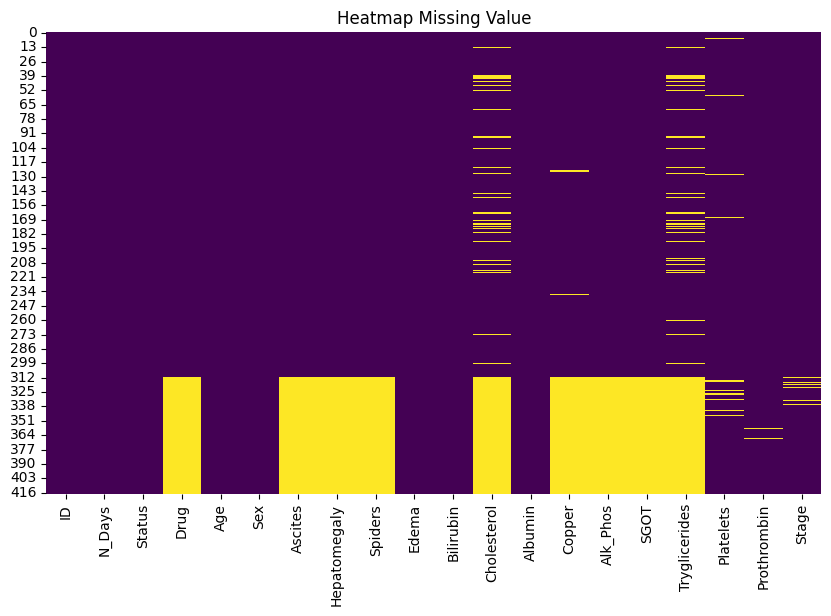


✅ Confusion Matrix:
[[39  1  4]
 [ 4  0  0]
 [10  0 26]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.80        44
           1       0.00      0.00      0.00         4
           2       0.87      0.72      0.79        36

    accuracy                           0.77        84
   macro avg       0.53      0.54      0.53        84
weighted avg       0.76      0.77      0.76        84



In [8]:
# STEP 0: IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# STEP 1: PEMAHAMAN DATA
df = pd.read_csv('cirrhosis.csv')

print("✅ Data Teratas:")
print(df.head())

print("\n✅ Info Dataset:")
print(df.info())

print("\n✅ Statistik Deskriptif:")
print(df.describe(include='all'))

print("\n✅ Missing Values:")
print(df.isnull().sum())

# Visualisasi Missing Values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap Missing Value")
plt.show()

# STEP 2: PREPROCESSING
# Hapus kolom ID jika ada
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

# Encoding kolom kategorikal
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Imputasi nilai kosong
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Normalisasi
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

# STEP 3: PEMODELAN - KNN
# Pastikan kolom target ada
if 'Status' in df.columns:
    X = df_scaled.drop(columns='Status')
    y = df['Status']  # target asli

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Prediksi dan evaluasi
    y_pred = knn.predict(X_test)

    print("\n✅ Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\n✅ Classification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("\n⚠️ Kolom target 'Status' tidak ditemukan. Ganti target yang sesuai.")


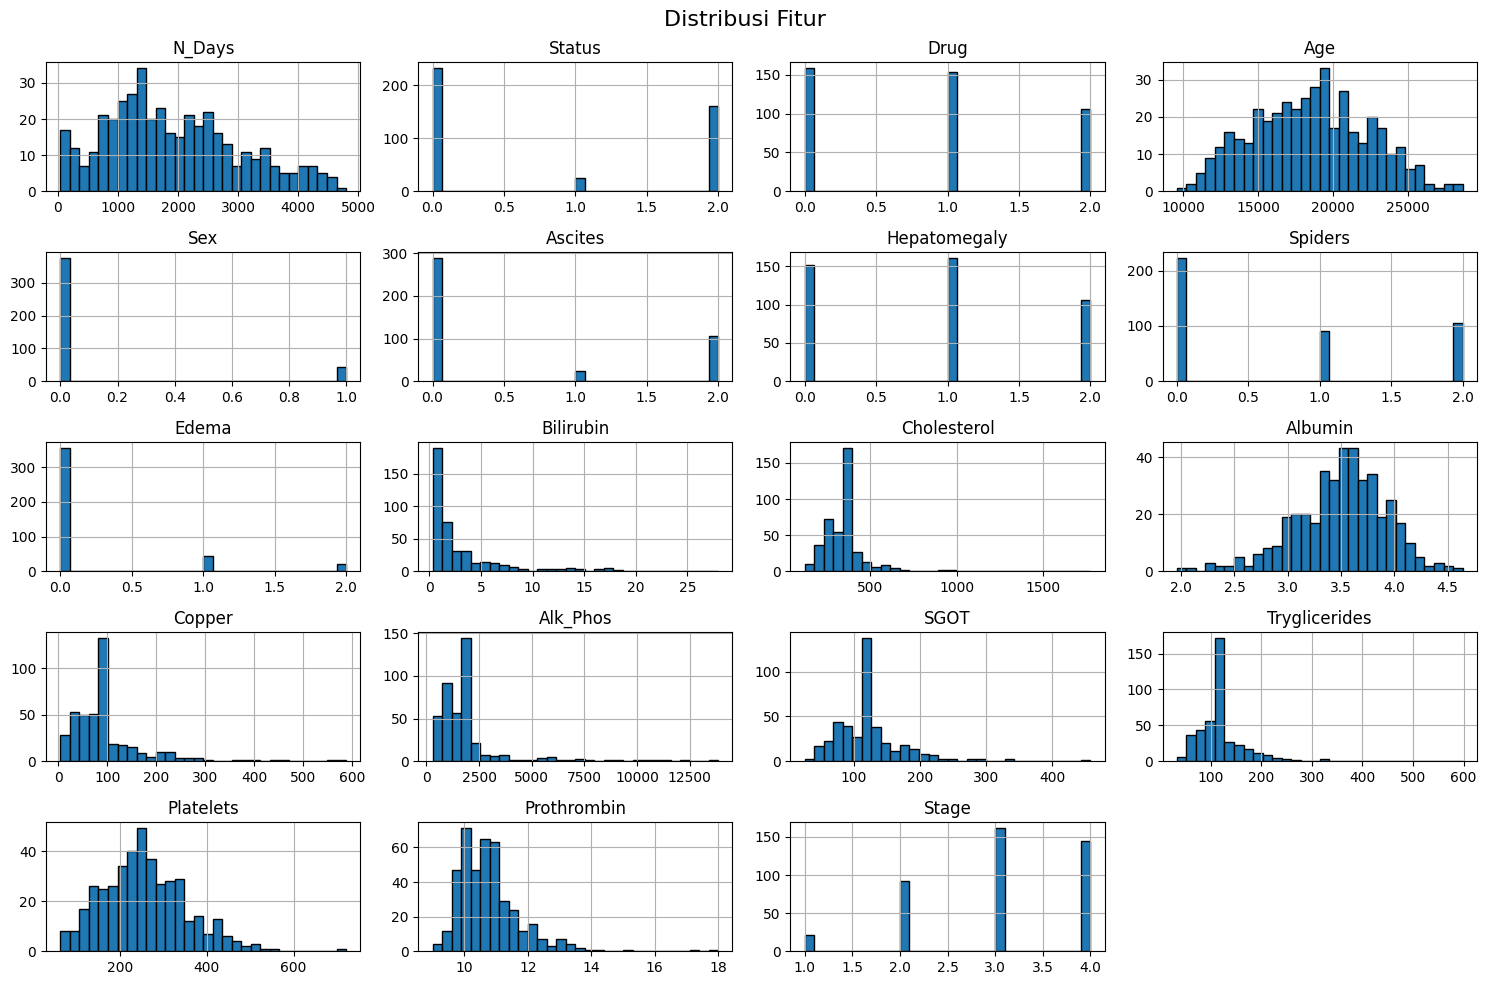

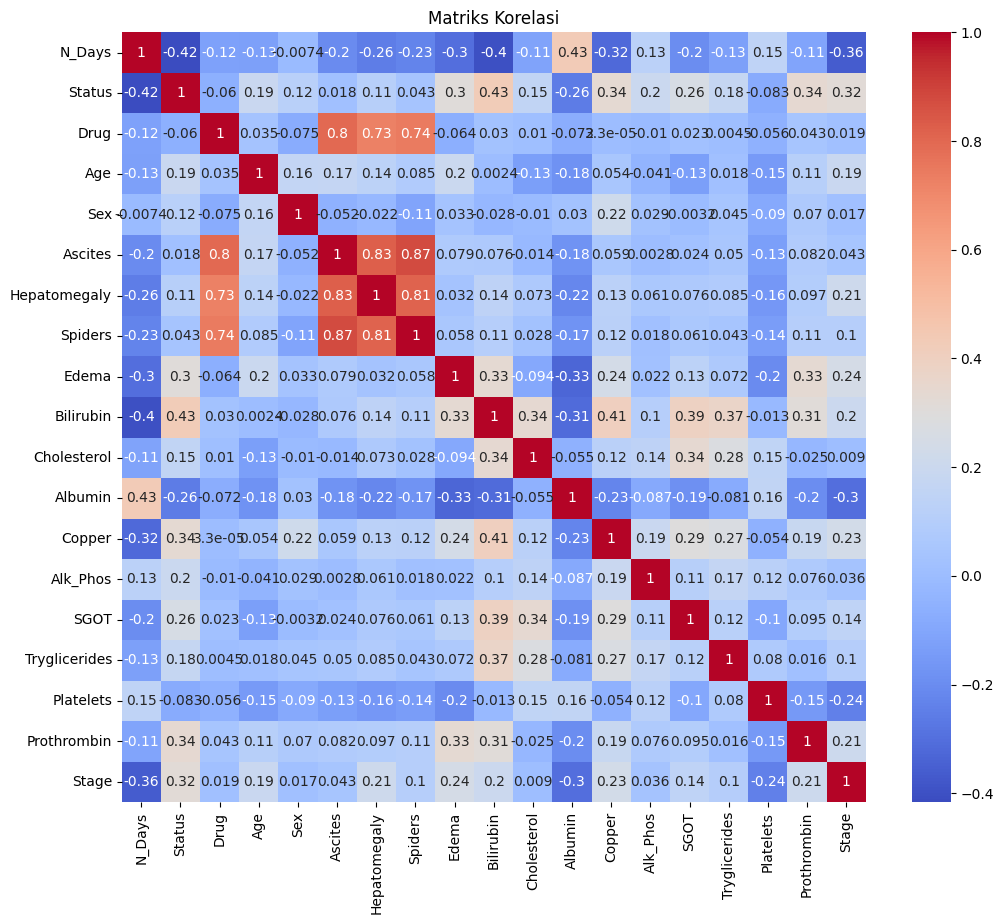

Jumlah outlier terdeteksi: 13

✅ Confusion Matrix:
[[41  1  2]
 [ 4  1  1]
 [14  1 16]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.80        44
           1       0.33      0.17      0.22         6
           2       0.84      0.52      0.64        31

    accuracy                           0.72        81
   macro avg       0.62      0.54      0.55        81
weighted avg       0.72      0.72      0.69        81



In [12]:
# STEP 0: IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor

# STEP 1: LOAD DATA
df = pd.read_csv('cirrhosis.csv')
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

# Label encoding
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Imputasi missing value
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Simpan salinan untuk visualisasi awal (tanpa normalisasi)
df_viz = df_imputed.copy()

# Normalisasi
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

# ===========================================
# STEP 2: VISUALISASI DISTRIBUSI DAN KORELASI
# ===========================================
df_viz.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribusi Fitur", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df_viz.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

# ===========================================
# STEP 3: OUTLIER DETECTION with LOF
# ===========================================
lof = LocalOutlierFactor(n_neighbors=20)
y_pred_lof = lof.fit_predict(df_scaled)
lof_scores = -lof.negative_outlier_factor_

# Tandai dan hapus outlier
df_scaled['LOF_Score'] = lof_scores
df_scaled['Outlier'] = (y_pred_lof == -1).astype(int)

print(f"Jumlah outlier terdeteksi: {df_scaled['Outlier'].sum()}")

# Hapus outlier
df_cleaned = df_scaled[df_scaled['Outlier'] == 0].drop(columns=['LOF_Score', 'Outlier'])
df_target = df['Status'].reset_index(drop=True)  # target asli
df_target_cleaned = df_target[df_scaled['Outlier'] == 0].reset_index(drop=True)

# ===========================================
# STEP 4: KLASIFIKASI DENGAN KNN (SETELAH OUTLIER DIHAPUS)
# ===========================================
X = df_cleaned.drop(columns='Status')
y = df_target_cleaned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
